In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd

from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score

SOME IMPORTANT FUNCTIONS

In [2]:
def plot_roc_curve(fpr, tpr,auc):
    plt.plot(fpr, tpr, color='orange', label='ROC -AUC %.2f' %auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid()
    plt.legend()
    plt.show()
def analize_data(X_text,y_test,predictions,probs):
    print(pd.DataFrame(confusion_matrix(y_test, predictions), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']))
    print("\n")
    print(classification_report(y_test,predictions))
    probs=probs[:,1]
    auc = roc_auc_score(y_test, probs)
   
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fpr, tpr,auc)
    return auc

def plot_hist(classification,hist_value,data,bins,size,numeric=False):
    plt.figure(figsize=size)
    if numeric:
        plt.xticks(np.arange(0, max(data[hist_value]), max(data[hist_value]/20)))
    data[data[classification]==0][hist_value].hist(alpha=0.9,color='red',bins=bins)
    data[data[classification]==1][hist_value].hist(alpha=0.3,color='blue',bins=bins)

In [3]:
file = 'C:\\Users\\Forex1\\Desktop\\AI\\ml-german-credit\\data\\german.data'


names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv(file,names = names, delimiter=' ')
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


existingchecking  duration credithistory purpose  creditamount savings  \
0              A11         6           A34     A43          1169     A65   
1              A12        48           A32     A43          5951     A61   
2              A14        12           A34     A46          2096     A61   
3              A11        42           A32     A42          7882     A61   
4              A11        24           A33     A40          4870     A61   
5              A14        36           A32     A46          9055     A65   
6              A14        24           A32     A42          2835     A63   
7              A12        36           A32     A41          6948     A61   
8              A14        12           A32     A43          3059     A64   
9              A12        30           A34     A40          5234     A61   

  employmentsince  installmentrate statussex otherdebtors  ...  property age  \
0             A75                4       A93         A101  ...      A121  67   
1             A73                2       A92         A101  ...      A121  22   
2             A74                2       A93         A101  ...      A121  49   
3             A74                2       A93         A103  ...      A122  45   
4             A73                3       A93         A101  ...      A124  53   
5             A73                2       A93         A101  ...      A124  35   
6             A75                3       A93         A101  ...      A122  53   
7             A73                2       A93         A101  ...      A123  35   
8             A74                2       A91         A101  ...      A121  61   
9             A71                4       A94         A101  ...      A123  28   

   otherinstallmentplans housing existingcredits   job peopleliable  \
0                   A143    A152               2  A173            1   
1                   A143    A152               1  A173            1   
2                   A143    A152               1  A172            2   
3                   A143    A153               1  A173            2   
4                   A143    A153               2  A173            2   
5                   A143    A153               1  A172            2   
6                   A143    A152               1  A173            1   
7                   A143    A151               1  A174            1   
8                   A143    A152               1  A172            1   
9                   A143    A152               2  A174            1   

   telephone foreignworker classification  
0       A192          A201              1  
1       A191          A201              2  
2       A191          A201              1  
3       A191          A201              1  
4       A191          A201              2  
5       A192          A201              1  
6       A191          A201              1  
7       A192          A201              1  
8       A191          A201              1  
9       A191          A201              2  

[10 rows x 21 columns]

In [4]:
data['classification'].replace([1,2], [1,0], inplace=True)
data['classification'].value_counts()


1    700
0    300
Name: classification, dtype: int64

For simplify binary classification

0 - BAD CLIENT
1 -GOOD CLIENT

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable']



In [7]:
data[numvars].describe()

creditamount     duration  installmentrate  residencesince  \
count   1000.000000  1000.000000      1000.000000     1000.000000   
mean    3271.258000    20.903000         2.973000        2.845000   
std     2822.736876    12.058814         1.118715        1.103718   
min      250.000000     4.000000         1.000000        1.000000   
25%     1365.500000    12.000000         2.000000        2.000000   
50%     2319.500000    18.000000         3.000000        3.000000   
75%     3972.250000    24.000000         4.000000        4.000000   
max    18424.000000    72.000000         4.000000        4.000000   

               age  existingcredits  peopleliable  
count  1000.000000      1000.000000   1000.000000  
mean     35.546000         1.407000      1.155000  
std      11.375469         0.577654      0.362086  
min      19.000000         1.000000      1.000000  
25%      27.000000         1.000000      1.000000  
50%      33.000000         1.000000      1.000000  
75%      42.000000         2.000000      1.000000  
max      75.000000         4.000000      2.000000

In [8]:
# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars]),columns=numvars)

In [9]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

# Encoding the variable
catdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))
catdata_std =pd.DataFrame(StandardScaler().fit_transform(catdata),columns=catvars)

In [10]:
data_prep = pd.concat([numdata_std, catdata_std,data['classification']], axis = 1)

In [11]:
data_prep

creditamount  duration  installmentrate  residencesince       age  \
0       -0.745131 -1.236478         0.918477        1.046987  2.766456   
1        0.949817  2.248194        -0.870183       -0.765977 -1.191404   
2       -0.416562 -0.738668        -0.870183        0.140505  1.183312   
3        1.634247  1.750384        -0.870183        1.046987  0.831502   
4        0.566664  0.256953         0.024147        1.046987  1.535122   
..            ...       ...              ...             ...       ...   
995     -0.544162 -0.738668         0.024147        1.046987 -0.399832   
996      0.207612  0.754763         0.918477        1.046987  0.391740   
997     -0.874503 -0.738668         0.918477        1.046987  0.215835   
998     -0.505528  1.999289         0.918477        1.046987 -1.103451   
999      0.462457  1.999289         0.024147        1.046987 -0.751642   

     existingcredits  peopleliable  existingchecking  credithistory   purpose  \
0           1.027079     -0.428290         -1.254566       1.344014  0.264068   
1          -0.704926     -0.428290         -0.459026      -0.503428  0.264068   
2          -0.704926      2.334869          1.132053       1.344014  1.359785   
3          -0.704926      2.334869         -1.254566      -0.503428 -0.101171   
4           1.027079      2.334869         -1.254566       0.420293 -1.196889   
..               ...           ...               ...            ...       ...   
995        -0.704926     -0.428290          1.132053      -0.503428 -0.101171   
996        -0.704926     -0.428290         -1.254566      -0.503428 -0.831650   
997        -0.704926     -0.428290          1.132053      -0.503428  0.264068   
998        -0.704926     -0.428290         -1.254566      -0.503428  0.264068   
999        -0.704926     -0.428290         -0.459026       1.344014 -0.831650   

     ...  employmentsince  statussex  otherdebtors  property  \
0    ...         1.338078   0.449326     -0.303686 -1.293723   
1    ...        -0.317959  -0.963650     -0.303686 -1.293723   
2    ...         0.510060   0.449326     -0.303686 -1.293723   
3    ...         0.510060   0.449326      3.885083 -0.341055   
4    ...        -0.317959   0.449326     -0.303686  1.564281   
..   ...              ...        ...           ...       ...   
995  ...         0.510060  -0.963650     -0.303686 -1.293723   
996  ...        -0.317959  -2.376626     -0.303686 -0.341055   
997  ...         1.338078   0.449326     -0.303686  0.611613   
998  ...        -0.317959   0.449326     -0.303686  1.564281   
999  ...        -1.973997   0.449326     -0.303686  0.611613   

     otherinstallmentplans   housing       job  telephone  foreignworker  \
0                 0.460831  0.133710  0.146949   1.214598      -0.196014   
1                 0.460831  0.133710  0.146949  -0.823318      -0.196014   
2                 0.460831  0.133710 -1.383771  -0.823318      -0.196014   
3                 0.460831  2.016956  0.146949  -0.823318      -0.196014   
4                 0.460831  2.016956  0.146949  -0.823318      -0.196014   
..                     ...       ...       ...        ...            ...   
995               0.460831  0.133710 -1.383771  -0.823318      -0.196014   
996               0.460831  0.133710  1.677670   1.214598      -0.196014   
997               0.460831  0.133710  0.146949  -0.823318      -0.196014   
998               0.460831  2.016956  0.146949   1.214598      -0.196014   
999               0.460831  0.133710  0.146949  -0.823318      -0.196014   

     classification  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0  
..              ...  
995               1  
996               1  
997               1  
998               0  
999               1  

[1000 rows x 21 columns]

In [12]:
from sklearn.model_selection import train_test_split  

X = data_prep.drop('classification', axis=1)
y = data_prep['classification']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

#X_u = data_prep_undersampl.drop('classification', axis=1)
#y_u = data_prep_undersampl['classification']
#X_u_train, X_u_test, y_u_train, y_u_test = train_test_split(X_u,y_u,test_size=0.2,random_state=111)

In [13]:
Xy_train=pd.concat([X_train,y_train],axis=1)
Xy_train['classification'].value_counts()

1    561
0    239
Name: classification, dtype: int64

In [14]:
Xy_train_undersampl=pd.concat([Xy_train[Xy_train['classification']==0],Xy_train[Xy_train['classification']==1].sample(n=320)]).sample(frac=1)
X_u_train=Xy_train_undersampl.drop('classification',axis=1)
y_u_train=Xy_train_undersampl['classification']

In [15]:
y_test.value_counts()

1    139
0     61
Name: classification, dtype: int64

In [16]:
Comp_DF=pd.DataFrame(np.zeros((2,7)), 
             columns=['MLP','MLP_U','BAYES','BAYES_U','FOREST','FOREST_U','HYBRID'], 
             index=['AUC', 'Indicator'])

In [17]:
Comp_DF

MLP  MLP_U  BAYES  BAYES_U  FOREST  FOREST_U  HYBRID
AUC        0.0    0.0    0.0      0.0     0.0       0.0     0.0
Indicator  0.0    0.0    0.0      0.0     0.0       0.0     0.0

In [18]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(100,40,100), max_iter=1000,verbose=True)  
mlp.fit(X_train, y_train.values.reshape(-1))  

Iteration 1, loss = 0.73492255
Iteration 2, loss = 0.63829652
Iteration 3, loss = 0.59522498
Iteration 4, loss = 0.57923357
Iteration 5, loss = 0.56850971
Iteration 6, loss = 0.55174556
Iteration 7, loss = 0.53698916
Iteration 8, loss = 0.52376986
Iteration 9, loss = 0.51363163
Iteration 10, loss = 0.50312010
Iteration 11, loss = 0.49253290
Iteration 12, loss = 0.48292918
Iteration 13, loss = 0.47482397
Iteration 14, loss = 0.46712649
Iteration 15, loss = 0.45953573
Iteration 16, loss = 0.45197334
Iteration 17, loss = 0.44466674
Iteration 18, loss = 0.43804858
Iteration 19, loss = 0.43108431
Iteration 20, loss = 0.42410589
Iteration 21, loss = 0.41658529
Iteration 22, loss = 0.40941347
Iteration 23, loss = 0.40136009
Iteration 24, loss = 0.39350295
Iteration 25, loss = 0.38556711
Iteration 26, loss = 0.37740662
Iteration 27, loss = 0.36795019
Iteration 28, loss = 0.36110531
Iteration 29, loss = 0.34944989
Iteration 30, loss = 0.34064527
Iteration 31, loss = 0.33007431
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 40, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

                 Predicted Negative  Predicted Positive
Actual Negative                  36                  25
Actual Positive                  22                 117


              precision    recall  f1-score   support

           0       0.62      0.59      0.61        61
           1       0.82      0.84      0.83       139

    accuracy                           0.77       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.76      0.77      0.76       200



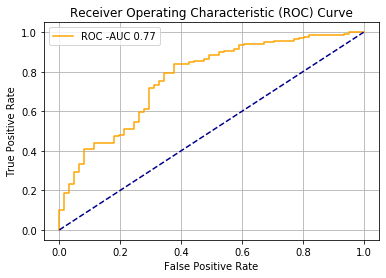

In [19]:
predictions = mlp.predict(X_test)
probs = mlp.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [20]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['MLP']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['MLP']['AUC']=auc

In [21]:
mlp_u = MLPClassifier(hidden_layer_sizes=(100,40,100), max_iter=1000,verbose=True)  
mlp_u.fit(X_u_train, y_u_train.values.reshape(-1))  

Iteration 1, loss = 0.67661183
Iteration 2, loss = 0.65460303
Iteration 3, loss = 0.63609887
Iteration 4, loss = 0.61720764
Iteration 5, loss = 0.59789008
Iteration 6, loss = 0.57837978
Iteration 7, loss = 0.55906244
Iteration 8, loss = 0.54179961
Iteration 9, loss = 0.52823069
Iteration 10, loss = 0.51419220
Iteration 11, loss = 0.50448457
Iteration 12, loss = 0.49540601
Iteration 13, loss = 0.48554563
Iteration 14, loss = 0.47613780
Iteration 15, loss = 0.46774793
Iteration 16, loss = 0.45875327
Iteration 17, loss = 0.44929064
Iteration 18, loss = 0.44070642
Iteration 19, loss = 0.43167370
Iteration 20, loss = 0.42235833
Iteration 21, loss = 0.41278673
Iteration 22, loss = 0.40327687
Iteration 23, loss = 0.39368642
Iteration 24, loss = 0.38274856
Iteration 25, loss = 0.37374908
Iteration 26, loss = 0.36374842
Iteration 27, loss = 0.35249052
Iteration 28, loss = 0.34142594
Iteration 29, loss = 0.32999694
Iteration 30, loss = 0.31909836
Iteration 31, loss = 0.30826072
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 40, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

                 Predicted Negative  Predicted Positive
Actual Negative                  43                  18
Actual Positive                  27                 112


              precision    recall  f1-score   support

           0       0.61      0.70      0.66        61
           1       0.86      0.81      0.83       139

    accuracy                           0.78       200
   macro avg       0.74      0.76      0.74       200
weighted avg       0.79      0.78      0.78       200



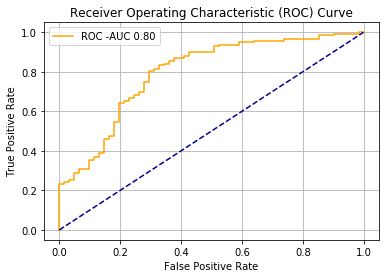

In [22]:
predictions = mlp_u.predict(X_test)
probs = mlp_u.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [23]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['MLP_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['MLP_U']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  38                  23
Actual Positive                  30                 109


              precision    recall  f1-score   support

           0       0.56      0.62      0.59        61
           1       0.83      0.78      0.80       139

    accuracy                           0.73       200
   macro avg       0.69      0.70      0.70       200
weighted avg       0.74      0.73      0.74       200



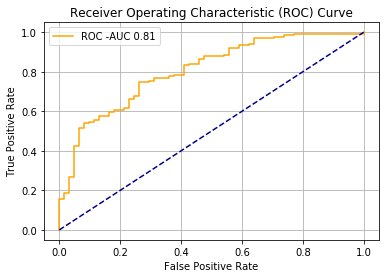

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
probs = gnb.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [25]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['BAYES']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['BAYES']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  44                  17
Actual Positive                  38                 101


              precision    recall  f1-score   support

           0       0.54      0.72      0.62        61
           1       0.86      0.73      0.79       139

    accuracy                           0.73       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.76      0.72      0.73       200



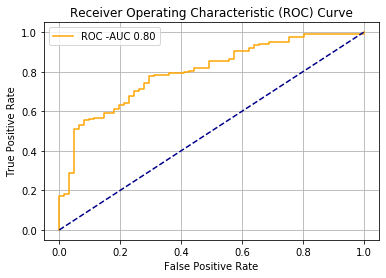

In [26]:
gnb_u = GaussianNB()
gnb_u.fit(X_u_train, y_u_train)
predictions = gnb_u.predict(X_test)
probs = gnb_u.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [27]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['BAYES_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['BAYES_U']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  25                  36
Actual Positive                   6                 133


              precision    recall  f1-score   support

           0       0.81      0.41      0.54        61
           1       0.79      0.96      0.86       139

    accuracy                           0.79       200
   macro avg       0.80      0.68      0.70       200
weighted avg       0.79      0.79      0.77       200



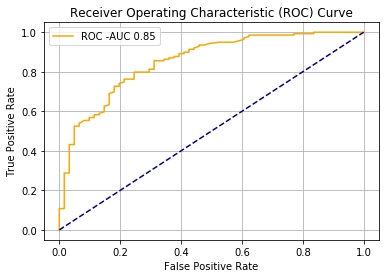

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
probs = rfc.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [29]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['FOREST']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['FOREST']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  39                  22
Actual Positive                  25                 114


              precision    recall  f1-score   support

           0       0.61      0.64      0.62        61
           1       0.84      0.82      0.83       139

    accuracy                           0.77       200
   macro avg       0.72      0.73      0.73       200
weighted avg       0.77      0.77      0.77       200



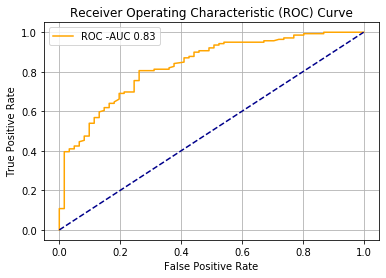

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc_u=RandomForestClassifier(n_estimators=500)
rfc_u.fit(X_u_train,y_u_train)
predictions = rfc_u.predict(X_test)
probs = rfc_u.predict_proba(X_test)
auc = analize_data(X_test,y_test,predictions,probs)

In [31]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['FOREST_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['FOREST_U']['AUC']=auc

System Proposotion

In [32]:
def Predictions(sample_X):

    pred_gnb = gnb.predict(sample_X)
    pred_rfc = rfc.predict(sample_X)
    pred_mlp = mlp.predict(sample_X)
    
    voting=round((pred_gnb[0]+pred_rfc[0]+pred_mlp[0])/3)
    if voting:
        pred_u_gnb = gnb_u.predict(sample_X)
        pred_u_rfc  = rfc_u.predict(sample_X)
        pred_u_mlp  = mlp_u.predict(sample_X)
        
        prob_u_gnb = gnb_u.predict_proba(sample_X)[0]
        prob_u_rfc = rfc_u.predict_proba(sample_X)[0]
        prob_u_mlp = mlp_u.predict_proba(sample_X)[0]
        
        voting=round((pred_u_gnb[0]+pred_u_rfc[0]+pred_u_mlp[0])/3)
        prob=max(prob_u_gnb,prob_u_rfc,prob_u_mlp,key=lambda x: x[1]) if voting \
             else min(prob_u_gnb,prob_u_rfc,prob_u_mlp,key=lambda x: x[1])
        
    else:
        prob_gnb = gnb.predict_proba(sample_X)[0]
        prob_rfc = rfc.predict_proba(sample_X)[0]
        prob_mlp = mlp.predict_proba(sample_X)[0]
        prob=min(prob_gnb,prob_rfc,prob_mlp, key=lambda x: x[1])
    return voting,prob

In [33]:
predictions=[]
probs=[]
for index, sample_X in X_test.iterrows():
    sample_X=sample_X.values.reshape(1,-1)
    voting,prob=Predictions(sample_X)
    predictions.append(voting)
    probs.append([prob[0],prob[1]])
    

                 Predicted Negative  Predicted Positive
Actual Negative                  42                  19
Actual Positive                  26                 113


              precision    recall  f1-score   support

           0       0.62      0.69      0.65        61
           1       0.86      0.81      0.83       139

    accuracy                           0.78       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.78      0.78      0.78       200



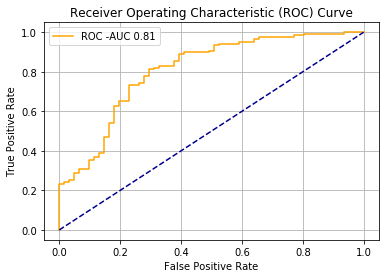

In [34]:
auc = analize_data(X_test,y_test,predictions,np.array(probs))


In [35]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['HYBRID']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['HYBRID']['AUC']=auc
Comp_DF_T=Comp_DF.transpose()

In [36]:
Comp_DF

MLP     MLP_U     BAYES   BAYES_U    FOREST  FOREST_U  \
AUC        0.767661  0.795259  0.805873  0.799976  0.852872  0.830758   
Indicator -0.735000 -0.585000 -0.725000 -0.615000 -0.930000 -0.675000   

             HYBRID  
AUC        0.806817  
Indicator -0.605000

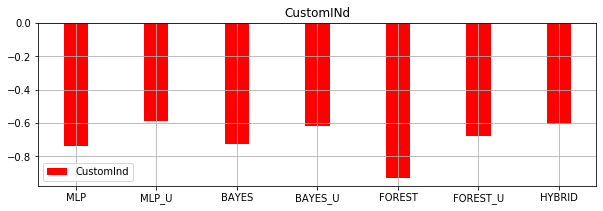

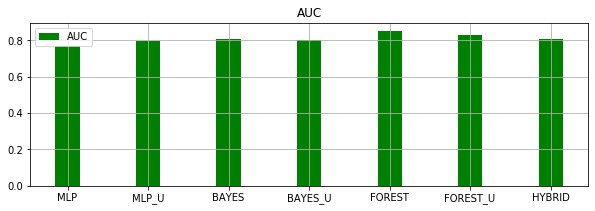

In [37]:
plt.figure(figsize=(10,3))
plt.bar(Comp_DF_T.index.values,Comp_DF_T['Indicator'],width=0.3,label='CustomInd',color='red',)
plt.title('CustomINd')
plt.legend()
plt.grid()

plt.figure(figsize=(10,3))
plt.bar(Comp_DF_T.index.values,Comp_DF_T['AUC'],width=0.3,label='AUC',color='green',)
plt.title('AUC')
plt.legend()
plt.grid()

Features research

In [38]:
Features=list(zip(X.columns,rfc.feature_importances_))
Features.sort(key=lambda b: b[1],reverse=True)
Features

[('creditamount', 0.12818126707865468),
 ('age', 0.1071872045713177),
 ('existingchecking', 0.10691756356735514),
 ('duration', 0.10053706191698744),
 ('purpose', 0.0650405839414751),
 ('credithistory', 0.06308593356241284),
 ('employmentsince', 0.05247271165445772),
 ('savings', 0.04638876423604046),
 ('property', 0.04450463229737536),
 ('installmentrate', 0.043203975682681695),
 ('residencesince', 0.042775556358111075),
 ('statussex', 0.0375867755628629),
 ('job', 0.03153913019735513),
 ('otherinstallmentplans', 0.02574411846458437),
 ('housing', 0.02477475277699877),
 ('existingcredits', 0.021882477943323472),
 ('otherdebtors', 0.020243831281747733),
 ('telephone', 0.01974822727936659),
 ('peopleliable', 0.013396134705884188),
 ('foreignworker', 0.004789296921007688)]

In [39]:
mostImportantFeatures=[x for x in Features if x[1]>np.mean(rfc.feature_importances_)]
mostImportantFeatures

[('creditamount', 0.12818126707865468),
 ('age', 0.1071872045713177),
 ('existingchecking', 0.10691756356735514),
 ('duration', 0.10053706191698744),
 ('purpose', 0.0650405839414751),
 ('credithistory', 0.06308593356241284),
 ('employmentsince', 0.05247271165445772)]

Histograms

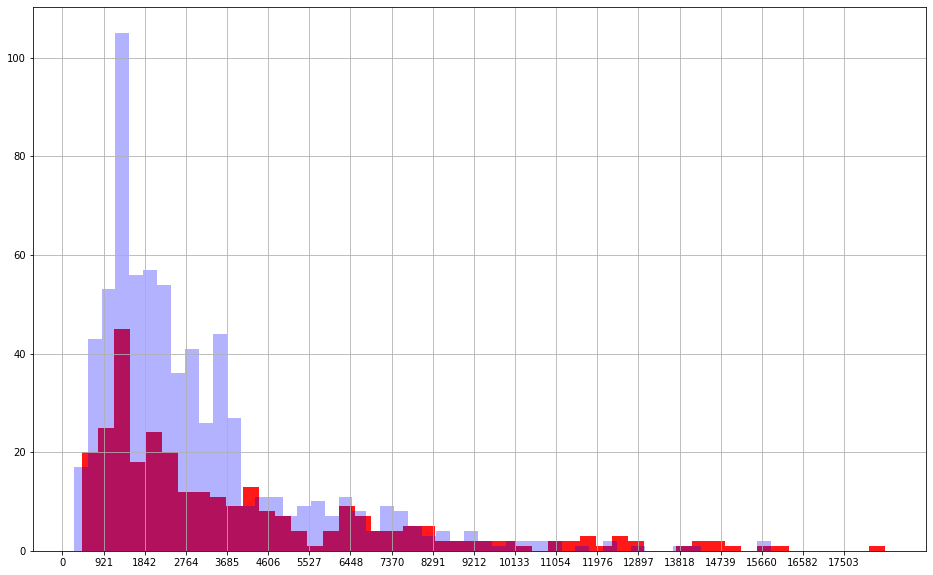

In [40]:
plot_hist('classification','creditamount',data,50,(16,10),True)

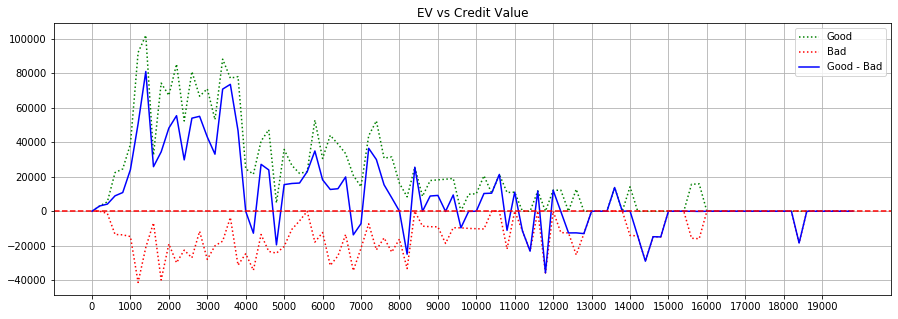

In [41]:
credit_dict={0: [],1 :[],2: [],3: []}
step=200
for cr in range(0,20000,step):
    credit_dict[0].append(cr)
    credit_dict[1].append(
    data[(data['classification']==1) &  (data['creditamount']>=cr) \
         & (data['creditamount']<cr+step)]['creditamount'].sum())
    credit_dict[2].append(-
    data[(data['classification']==0) &  (data['creditamount']>=cr) \
         & (data['creditamount']<cr+step)]['creditamount'].sum())
    credit_dict[3].append(credit_dict[1][-1]+credit_dict[2][-1])
credit_df=pd.DataFrame.from_dict(credit_dict)
#data
#pd.DataFrame.from_dict(credit_dict)
plt.figure(figsize=(15,5))
plt.plot(credit_df[0],credit_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(credit_df[0],credit_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(credit_df[0],credit_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(0, 20000, 1000))
plt.title('EV vs Credit Value')
plt.legend()
plt.grid()


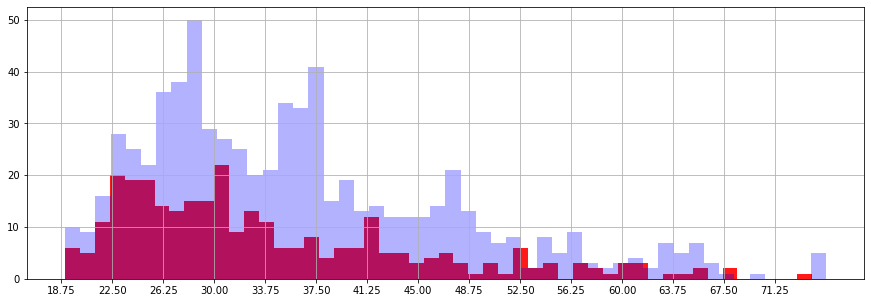

In [42]:
plot_hist('classification','age',data,50,(15,5),True)

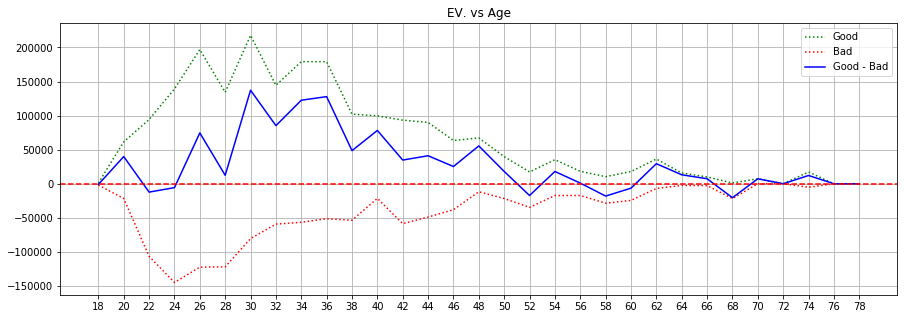

In [43]:
age_dict={0: [],1 :[], 2:[], 3:[]}
step=2
for ag in range(18,80,step):
    age_dict[0].append(ag)
    
    age_dict[1].append(data[\
                           (data['classification']==1)\
                       &   (data['age']>=ag) \
                       &   (data['age']<ag+step)\
                           ]['creditamount'].sum())
    age_dict[2].append(-data[\
                           (data['classification']==0)\
                       &   (data['age']>=ag) \
                       &   (data['age']<ag+step)\
                           ]['creditamount'].sum())
    
    age_dict[3].append(age_dict[1][-1]+age_dict[2][-1])
    
age_df=pd.DataFrame.from_dict(age_dict)

plt.figure(figsize=(15,5))
plt.plot(age_df[0],age_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(age_df[0],age_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(age_df[0],age_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(18, 80, 2))
plt.title('EV. vs Age')
plt.legend()
plt.grid()

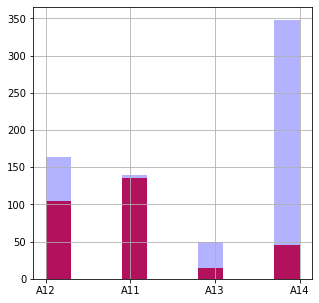

In [44]:
plot_hist('classification','existingchecking',data,10,(5,5))

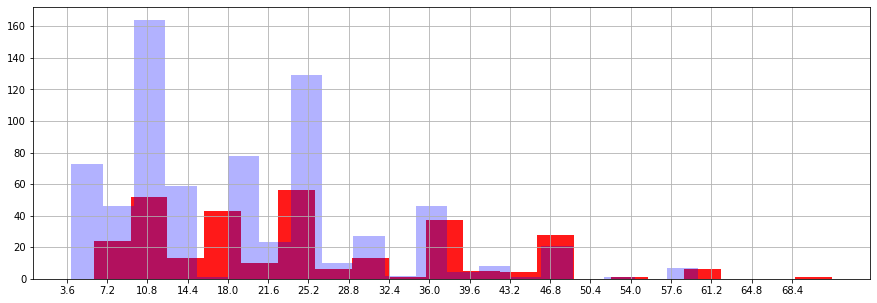

In [45]:
plot_hist('classification','duration',data,20,(15,5),True)

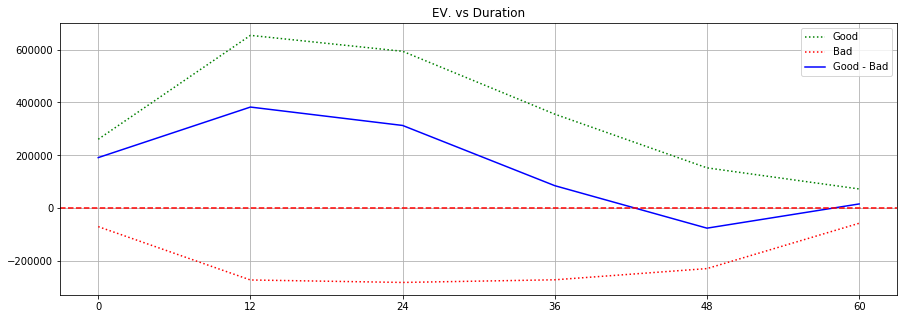

In [46]:
dur_dict={0: [],1 :[], 2:[], 3:[]}
step=12
for du in range(0,72,step):
    dur_dict[0].append(du)
    
    dur_dict[1].append(data[\
                           (data['classification']==1)\
                       &   (data['duration']>=du) \
                       &   (data['duration']<du+step)\
                           ]['creditamount'].sum())
    dur_dict[2].append(-data[\
                           (data['classification']==0)\
                       &   (data['duration']>=du) \
                       &   (data['duration']<du+step)\
                           ]['creditamount'].sum())
    
    dur_dict[3].append(dur_dict[1][-1]+dur_dict[2][-1])
    
dur_df=pd.DataFrame.from_dict(dur_dict)

plt.figure(figsize=(15,5))
plt.plot(dur_df[0],dur_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(dur_df[0],dur_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(dur_df[0],dur_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(0, 72, step))
plt.title('EV. vs Duration')
plt.legend()
plt.grid()

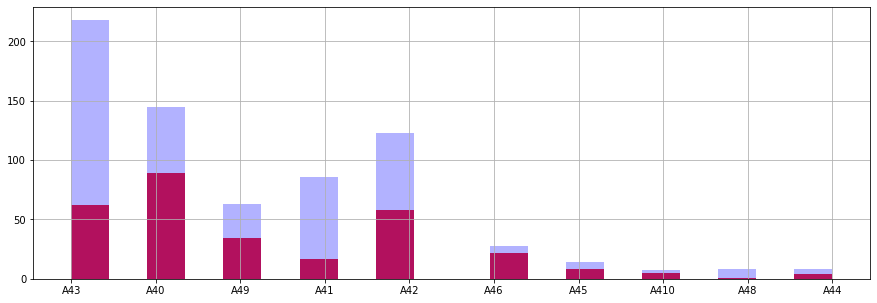

In [47]:
plot_hist('classification','purpose',data,20,(15,5))

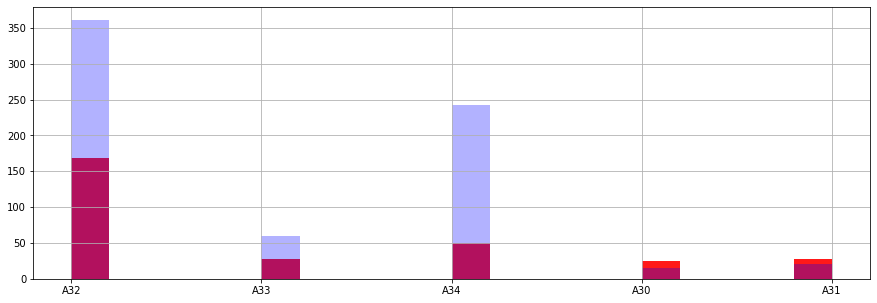

In [48]:
plot_hist('classification','credithistory',data,20,(15,5))

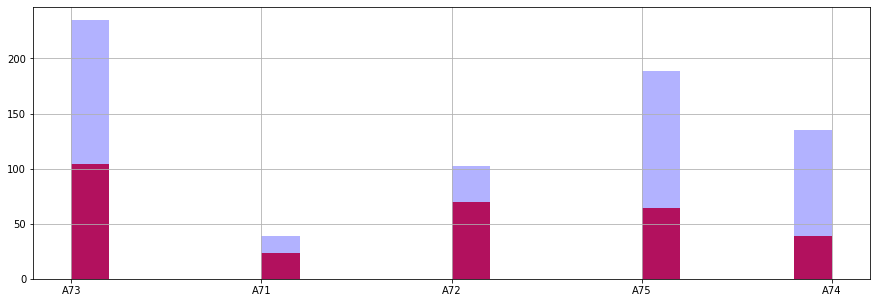

In [49]:
plot_hist('classification','employmentsince',data,20,(15,5))

ADDITIONAL RESEARCH

In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
cn=['good','bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=1200)
tree.plot_tree(dtree, 
               class_names=cn,
               feature_names =numvars+catvars,
               filled = True)
fig.savefig('imagename.png')

In [53]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,svd_solver='full')
pca.fit(X)
x_pca=pca.transform(X)
x_pca.shape,X.shape

((1000, 2), (1000, 20))

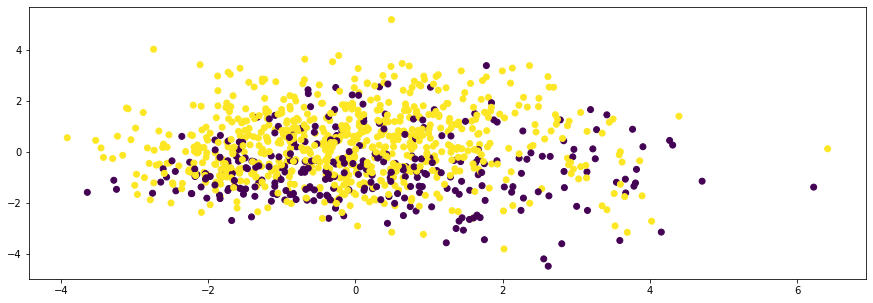

In [54]:
plt.figure(figsize=(15,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)


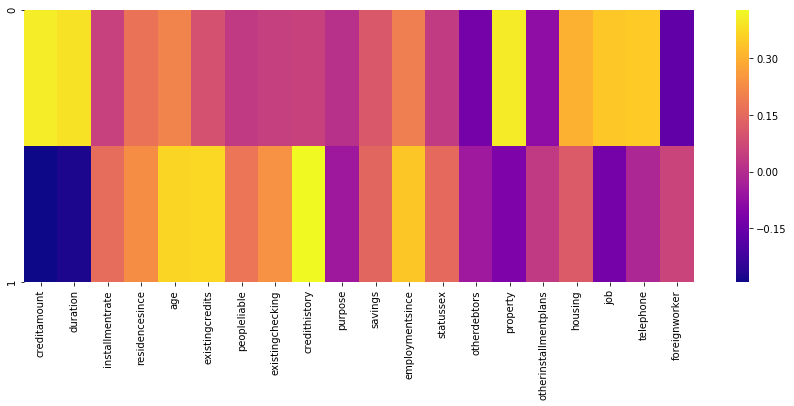

In [55]:
import seaborn as sb
components=pd.DataFrame(pca.components_,columns=numvars+catvars)
components
plt.figure(figsize=(15,5))
sb.heatmap(components,cmap='plasma')

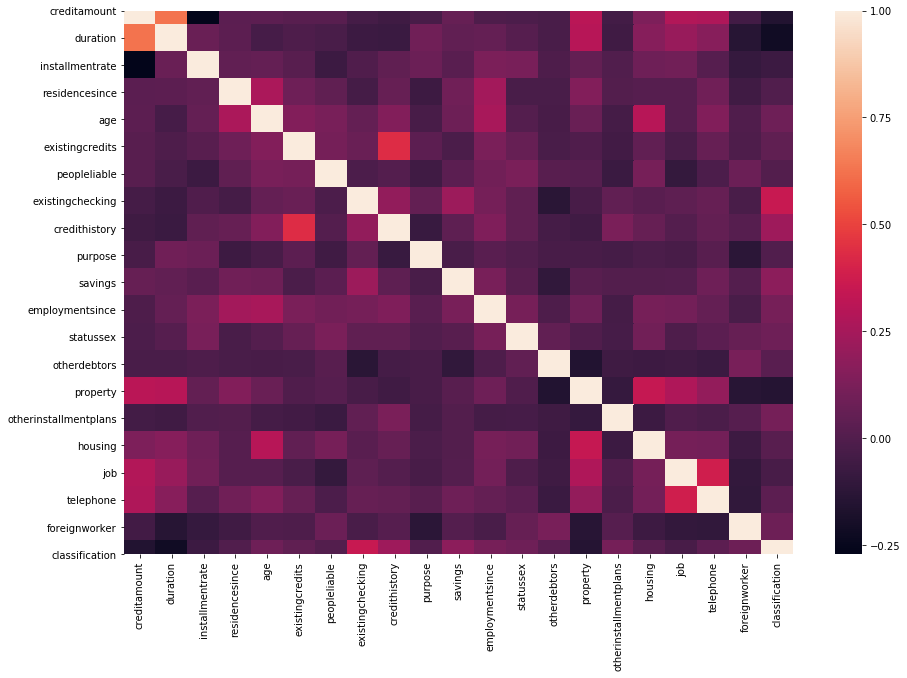

In [56]:
plt.figure(figsize=(15,10))
sb.heatmap(data_prep.corr());

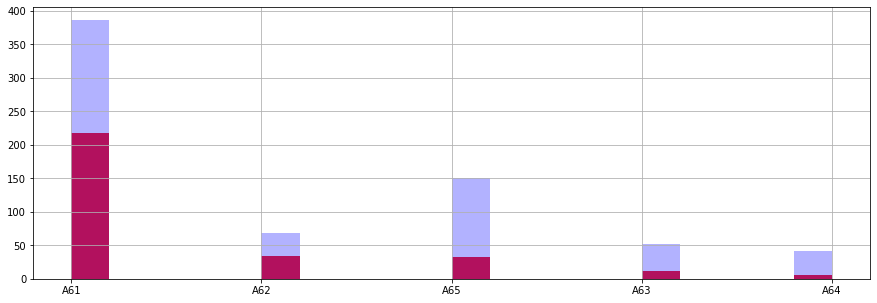

In [57]:
plot_hist('classification','savings',data,20,(15,5))